<H1>0. Import packages </H1>

In [1]:
%load_ext autoreload
%autoreload 2

import module as m
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
R = 8.314 # J/K. mol

<h2>1. Set range for variables </h2>

- Components concentratios
- Flow rate
- Temperature

In [275]:
n = 1000
Ca = m.generate_values(1, 2, n)
Cb = m.generate_values(1, 2, n)
Cc = m.generate_values(0, .1, n)
Cd = m.generate_values(0, .1, n)
T = m.generate_values(150+273, 170+273, n)
Q = m.generate_values(.1, .15, n)

data = pd.DataFrame()
data['Cae'] = Ca
data['Cbe'] = Cb
data['Cce'] = Cc
data['Cde'] = Cd
data['T'] = T
C = ['Cae', 'Cbe', 'Cce', 'Cde']

<h2>2. Set thermal properties</h2>

- $C_p$
- $\Delta H_r$
- $\rho$

In [276]:
Ea1 = 53e3 # J/mol
k01 = 5e3 # L/mol.s

Ea2 = Ea1/1.3 # J/mol
k02 = 5e1 # L/mol.s

V = 500 # L
dHr = 150e3 # J/mol
rho = 1.1e3 # g/L
Cp = 600 # J/g.K

# C: mol/L
# Q: L/s


data['Ea1'] = Ea1
data['k01'] = k01
data['Ea2'] = Ea2
data['k02'] = k02

data['dHr'] = dHr
data['rho'] = rho
data['Cp'] = Cp

data['t_spacial'] = V/Q

<h2>3. Solve steady State </h2>

- define wheter it is itothermal or not (adiabatic)
- solve the system for steady state
- save data

In [277]:
out = m.ss_solve(data, isothermal=True)
data1 = data.join(out.drop(columns=['T']))
data1.to_csv(f'datas/data.csv')

<h2>4. (OPTIONAL) Reactor Startup </h2>

- select one set from dataset
- define a amount of time
- define whether it is isothermal or not (adiabatic)
- solve the system

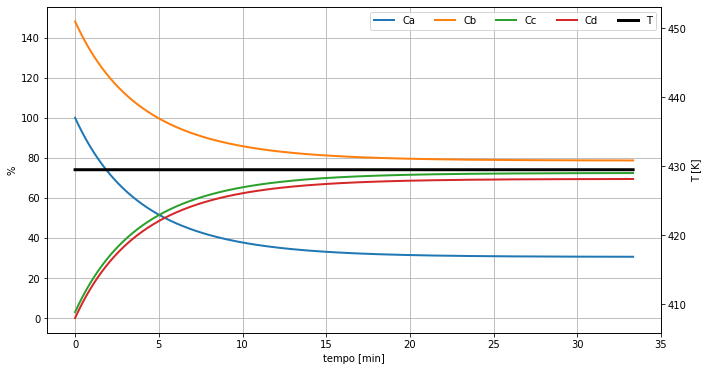

In [280]:
row = 0
ode_solved = m.ode_solve(data, n=10*n, t=2e3, row=row, isothermal=True)
m.ode_plot(ode_solved)

In [205]:
ss = m.steadyState(data.loc[row])
ss.constant_rate
print(f"k1: {ss.constant_rate(data.loc[row, 'T'], data.loc[row, 'k01'], data.loc[row, 'Ea1'])*1e3:.2f} .10^-3")
print(f"k2: {ss.constant_rate(data.loc[row, 'T'], data.loc[row, 'k02'], data.loc[row, 'Ea2'])*1e3:.2f} .10^-3")
print(f"X: {m.X( ode_solved['Ca'].values[0], ode_solved['Ca'].values[-1] ):.2f}")

k1: 3.06 .10^-3
k2: 0.83 .10^-3
X: 0.44
